#  Challenge Startup ML: Airline On-Time Arrivals 
## Name: Muaaz Bin Sarfaraz

### Task: Binary classification for predicting arrival is more than 15 minutes delayed(ArrDel15) without using any departure delay column as predictor

### Data source: US Dept. of Transportation on-time arrival data for non-stop domestic flights by major air carriers to predict arrival delays.
#### Link: https://transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
#### Downloaded with Prezipped check box selected and Filter setting was 
#### Filter Geography: All 
#### Filter Year: 2017
#### Filter Month: January

Approach: We would import the data set and perform basic data cleansing. An intense data visuaisation would be performed that might help in feature engineering, imputing missing values and in feature selection for final model.
Once data set is ready we would split into training set and test set by a ratio of 80-20.
Training set would be used to train two suitable models with hypertuning/grid search and model that gives the best performance on validation set would be selected. Best model would predict the test set. F1-score and ROC would be used to analyse the test set results. We would end the notebook with a brief note on further work.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer,roc_curve,confusion_matrix
import xgboost as xgb




# Importing Data Set

In [ ]:
# path = r'C:\startup ML Challenge\AllDatasets'                    
# all_files = glob.glob(os.path.join(path, "*.csv"))# advisable to use os.path.join as this makes concatenation OS independent

# df_from_each_file = (pd.read_csv(f) for f in all_files)
# airlines   = pd.concat(df_from_each_file, ignore_index=True)
# # doesn't create a list, nor does it append to one

C:\Users\Muaaz\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\Muaaz\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.


Using all 12 files for the year 2016 (one file per month) crashed the notebook.
Using only January 2017 Dataset for the binary classification task.

In [11]:
airlines=pd.read_csv('On_Time_On_Time_Performance_2017_1.csv')
airlines.head() #printing five initial rows to check import success

C:\Users\Muaaz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2017,1,1,17,2,2017-01-17,AA,19805,AA,N583AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,18,3,2017-01-18,AA,19805,AA,N544AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,19,4,2017-01-19,AA,19805,AA,N553AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,20,5,2017-01-20,AA,19805,AA,N191AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,21,6,2017-01-21,AA,19805,AA,N170AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.0 Data Wrangling
More than 100 dimensions in the table, however looks like most of the columns have NaN values. Would check the percentage of missing values and decide whether to impute values or drop the column from final prediction model.

In [3]:
print (airlines.shape) # to check row and col dimension

(450017, 110)


In [4]:
(len(airlines.index) - airlines.count())*100/len(airlines.index) #calculating missing value percentage per column

Year                    0.000000
Quarter                 0.000000
Month                   0.000000
DayofMonth              0.000000
DayOfWeek               0.000000
FlightDate              0.000000
UniqueCarrier           0.000000
AirlineID               0.000000
Carrier                 0.000000
TailNum                 0.141995
FlightNum               0.000000
OriginAirportID         0.000000
OriginAirportSeqID      0.000000
OriginCityMarketID      0.000000
Origin                  0.000000
OriginCityName          0.000000
OriginState             0.000000
OriginStateFips         0.000000
OriginStateName         0.000000
OriginWac               0.000000
DestAirportID           0.000000
DestAirportSeqID        0.000000
DestCityMarketID        0.000000
Dest                    0.000000
DestCityName            0.000000
DestState               0.000000
DestStateFips           0.000000
DestStateName           0.000000
DestWac                 0.000000
CRSDepTime              0.000000
          

### Many columns seem to be NULL (100% missing values), lets inspect further to confirm column index and drop them

In [12]:
missingvalues_col=[] #creating empty list
for i in range(110):
    if  airlines.iloc[:,i].count()< (len(airlines.index)*0.3): #if count of values in the column is less than 30% of total row count
        missingvalues_col.append(i)
print (missingvalues_col) #column index where missing values are more than 70%

[48, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


#### Time to remove columns listed in missingvalues_col because they have more than 70% missing values. Would just create a bias if we try to impute it in any way.

In [13]:
airlines.drop(airlines.columns[[missingvalues_col]], axis=1, inplace=True) 
#dropping columns where missing values are more than 70%

In [8]:
print (airlines.shape)
(len(airlines.index) - airlines.count())*100/len(airlines.index) #analysing missing_value column again 

(450017, 56)


Year                    0.000000
Quarter                 0.000000
Month                   0.000000
DayofMonth              0.000000
DayOfWeek               0.000000
FlightDate              0.000000
UniqueCarrier           0.000000
AirlineID               0.000000
Carrier                 0.000000
TailNum                 0.141995
FlightNum               0.000000
OriginAirportID         0.000000
OriginAirportSeqID      0.000000
OriginCityMarketID      0.000000
Origin                  0.000000
OriginCityName          0.000000
OriginState             0.000000
OriginStateFips         0.000000
OriginStateName         0.000000
OriginWac               0.000000
DestAirportID           0.000000
DestAirportSeqID        0.000000
DestCityMarketID        0.000000
Dest                    0.000000
DestCityName            0.000000
DestState               0.000000
DestStateFips           0.000000
DestStateName           0.000000
DestWac                 0.000000
CRSDepTime              0.000000
DepTime   

Problem is reduced to 56 dimensions from 110 dimensions after dropping columns with more than 70% missing values

Rows where ArrDel15(response variable/label) is missing can neither be used for training or testing , so dropping such rows

In [14]:
airlines=airlines.dropna(subset=['ArrDel15'], how='any') 
#dropping rows where main response class is missing
print (airlines.shape)
(len(airlines.index) - airlines.count())*100/len(airlines.index) 
#analysing missing_value column again

(439645, 56)


Year                    0.0
Quarter                 0.0
Month                   0.0
DayofMonth              0.0
DayOfWeek               0.0
FlightDate              0.0
UniqueCarrier           0.0
AirlineID               0.0
Carrier                 0.0
TailNum                 0.0
FlightNum               0.0
OriginAirportID         0.0
OriginAirportSeqID      0.0
OriginCityMarketID      0.0
Origin                  0.0
OriginCityName          0.0
OriginState             0.0
OriginStateFips         0.0
OriginStateName         0.0
OriginWac               0.0
DestAirportID           0.0
DestAirportSeqID        0.0
DestCityMarketID        0.0
Dest                    0.0
DestCityName            0.0
DestState               0.0
DestStateFips           0.0
DestStateName           0.0
DestWac                 0.0
CRSDepTime              0.0
DepTime                 0.0
DepDelay                0.0
DepDelayMinutes         0.0
DepDel15                0.0
DepartureDelayGroups    0.0
DepTimeBlk          

Fortunately removing rows where response class(label) was missing ended up with no missing values in any predictor class(attributes). We are so lucky Yayyy... No more missing values no hustle of imputing values.

Since the data is from 2017 Jan only the column Year, Quarter and Month are static(same) for all rows and can be dropped.

In [15]:
list =['Year','Quarter' ,'Month' ]            
airlines=airlines.drop(list,1)
print(airlines.shape)

(439645, 53)


# 2.0 Understanding Data using Visualisation and basic Statistics

### Before we jump into the prediction task its better to visualise the data and try to have some understanding of the data. This might help us in feature engineering or data transformation.

* Visualisation influenced by work on kaggle and github on airline dataset

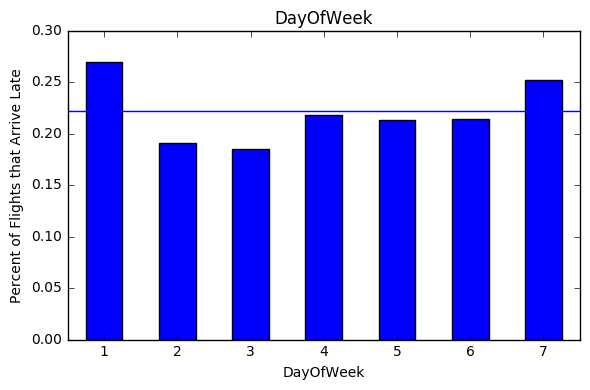

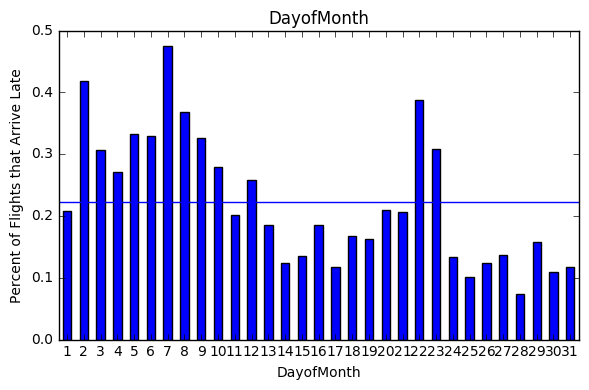

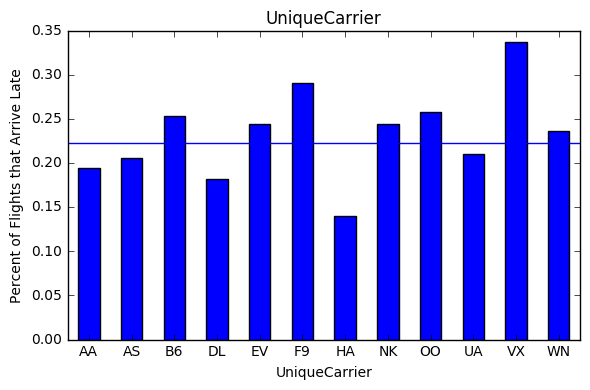

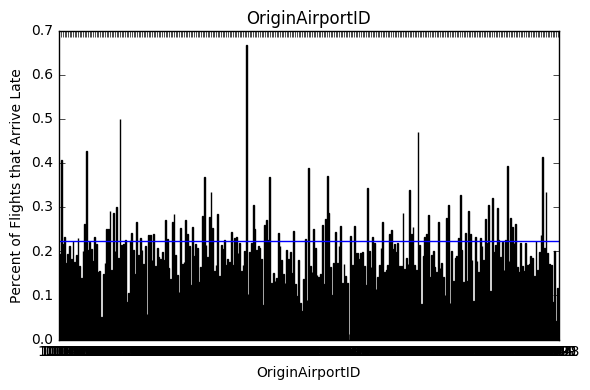

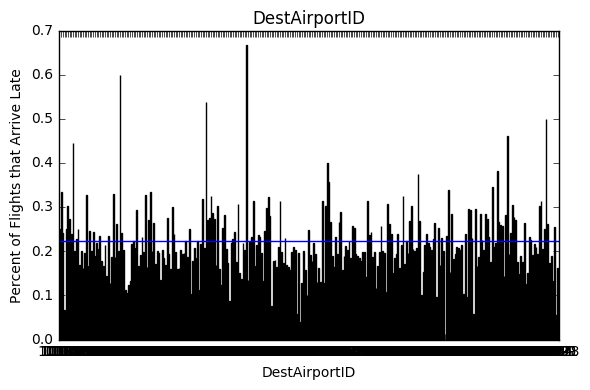

In [31]:
# The percentage of late flights based on all flights in the dataset
late_avg = np.sum(airlines.ArrDel15) / airlines.ArrDel15.shape[0]

x_axis = ['DayOfWeek', 'DayofMonth', 'UniqueCarrier','OriginAirportID','DestAirportID']

for col in x_axis:
    
    grouped = airlines.groupby([col], as_index=False).aggregate(np.mean)[[col, 'ArrDel15']]
    grouped.sort_values(by=col, inplace=True)
    
    grouped.plot.bar(x=col, y='ArrDel15')
    plt.axhline(y=late_avg, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(col)
    plt.legend().remove()
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

So out of 1 about 0.2 flights on average are late, even setting all labels at 0 (No flight delayed, a dumb classifier would end up in giving a decent classification accuracy that is more than 50%. In case of a uniformly picked test set close to 70% accuracy is expected. Thus, we can say that evaluating the result using confusion matrix or ROC would be a better choice rather than just looking at missclassifcation error, as it would give us insight into TP,FP,TN and FN.

Certain Destination and Origin Airports have very high chances of arrival delay. This attribute would be helpful for classifying ArrDel15 variable. Moroever, we see that week 1 and week 7 have on average more chances of flight arriving late. VX carrier has the highest probability of delaying flights on average. 

### Feature Engineering
Since we have distance(miles) of flight and time(minutes) taken we can calculate a new variable (Average fly speed) -miles/hour

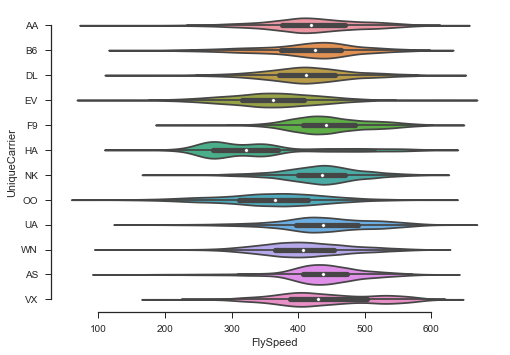

In [16]:
#sns.set(style="whitegrid")
%matplotlib inline
#new feature FlySpeed (miles/hour)
airlines['FlySpeed'] = 60*airlines['Distance']/airlines['AirTime'] 
#unit is miles per hour since distance is in Miles and Airtime in minutes
sns.set_context("notebook", font_scale=2.5)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="FlySpeed", y="UniqueCarrier", data=airlines);
sns.despine(trim=True)
#source: https://www.kaggle.com/dongxu027/airline-delays-key-learnings

Although we assumed VX to be the slowest considering that it was mostly late in compare to other carriers, but, HA is the slowest in speed mostly which had the the lowest chances of being late.  
Strange, it seems that carriers who are speeding are actually trying to make it on time while carriers driving slowly know that they would reach on time. 

In [58]:
airlines.dtypes

DayofMonth                int64
DayOfWeek                 int64
FlightDate               object
UniqueCarrier            object
AirlineID                 int64
Carrier                  object
TailNum                  object
FlightNum                 int64
OriginAirportID           int64
OriginAirportSeqID        int64
OriginCityMarketID        int64
Origin                   object
OriginCityName           object
OriginState              object
OriginStateFips           int64
OriginStateName          object
OriginWac                 int64
DestAirportID             int64
DestAirportSeqID          int64
DestCityMarketID          int64
Dest                     object
DestCityName             object
DestState                object
DestStateFips             int64
DestStateName            object
DestWac                   int64
CRSDepTime                int64
DepTime                 float64
DepDelay                float64
DepDelayMinutes         float64
DepDel15                float64
Departur

In [59]:
airlines.describe()

,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,...,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,FlySpeed
count,439645.000000,439645.000000,439645.000000,439645.000000,439645.000000,4.396450e+05,439645.000000,439645.000000,439645.000000,439645.000000,...,439645.0,439645.0,439645.000000,439645.000000,439645.000000,439645.0,439645.000000,439645.000000,439645.0,439645.000000
mean,16.033184,3.829474,19898.415870,2064.808705,12697.815383,1.269784e+06,31735.499223,25.537891,55.816456,12697.431582,...,0.0,0.0,148.234382,143.172273,118.427863,1.0,854.749541,3.887953,0.0,408.041195
std,8.979383,2.059095,384.001087,1713.264820,1533.464822,1.533462e+05,1284.471980,16.728061,27.091665,1533.223583,...,0.0,0.0,77.157275,76.701789,74.529136,0.0,617.822547,2.423022,0.0,75.238858
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,1.000000,1.000000,10135.000000,...,0.0,0.0,21.000000,16.000000,7.000000,1.0,31.000000,1.000000,0.0,77.307692
25%,8.000000,2.000000,19690.000000,676.000000,11292.000000,1.129202e+06,30647.000000,12.000000,34.000000,11292.000000,...,0.0,0.0,90.000000,86.000000,63.000000,1.0,391.000000,2.000000,0.0,361.090909
50%,16.000000,4.000000,19805.000000,1594.000000,12892.000000,1.289204e+06,31454.000000,24.000000,52.000000,12892.000000,...,0.0,0.0,130.000000,125.000000,100.000000,1.0,689.000000,3.000000,0.0,410.000000
75%,24.000000,6.000000,20304.000000,2987.000000,14057.000000,1.405702e+06,32467.000000,40.000000,82.000000,14057.000000,...,0.0,0.0,181.000000,176.000000,150.000000,1.0,1096.000000,5.000000,0.0,456.831683
max,31.000000,7.000000,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,78.000000,93.000000,16218.000000,...,0.0,0.0,712.000000,734.000000,704.000000,1.0,4983.000000,11.000000,0.0,651.428571


40 dimensions are numeric out of 53 dimensions. However carefully looking at the table we see some columns listed in basic stats are just IDs thus are nominal in nature. Looking at the list of data types and their decription on webiste we can confirm that this dataset is heavily categorical in nature. Random Forrest and Boosted Trees would be good choice for such datasets.

# 3.0 Model Building

Using only relevant predictor columns and avoiding repetition for example Origin ID ,
Origin are in essence telling the same story.


### Transforming Data for classification

In [17]:
col_to_use =['DayofMonth','DayOfWeek','UniqueCarrier','AirlineID','FlightNum', 'ArrTimeBlk',
'OriginAirportID','DestAirportID','DepTime', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn','ArrTime','Cancelled', 'DepTimeBlk',
 'Diverted','ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup','FlySpeed']

features = airlines[col_to_use] #predictors
labels=airlines['ArrDel15']  # ArrDel15 the response variable

cols_to_transform = [  'UniqueCarrier','DepTimeBlk', 'ArrTimeBlk']
features_dummy=pd.get_dummies(features,columns = cols_to_transform );

### Splitting into Training Set and Test Set (80% Training Set- 20% Test Set)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(features_dummy, labels, train_size=0.80, random_state=12)

### Random Forest Classifier- Model 1

In [121]:
forest = RandomForestClassifier(n_estimators = 89)
cv = cross_validation.KFold(len(xtrain), n_folds=10, shuffle=False, random_state=12)
scores = cross_val_score(forest, xtrain, ytrain, cv=cv)
print (sum(scores)/len(scores))
#estimated run time 30 minutes

0.929892289771


A very high accuracy achieved on Training set.
Lets try Grid Search for tuning the Model. And also try gradient boosted trees before using the final model on test set.

In [12]:
#  reducing to 2 folds, since computationally expensive, although higher folds are recommended
# by default random forest choses feature for branch based on Gini Index, however Information gain and entropy 
# should also be tried in the grid search. (I am not doing it to avoid computational time)
scorer = make_scorer(f1_score, average='micro') # F1-measure captures the essence of both precision and recall
forest = RandomForestClassifier()
#tuned_parameters = [{'n_estimators': [500,1000], 'max_features': ['auto', 'none']}]
tuned_parameters = [{'n_estimators': [10,20,100],'max_features': ['sqrt', 'log2']}]
clf = GridSearchCV(forest,tuned_parameters,scoring=scorer, cv=2)
clf.fit(xtrain, ytrain)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

Best parameters set found on development set:

{'max_features': 'sqrt', 'n_estimators': 100}
Grid scores on development set:

0.907 (+/-0.005) for {'max_features': 'sqrt', 'n_estimators': 10}

0.912 (+/-0.006) for {'max_features': 'sqrt', 'n_estimators': 20}

0.921 (+/-0.001) for {'max_features': 'sqrt', 'n_estimators': 100}

0.899 (+/-0.002) for {'max_features': 'log2', 'n_estimators': 10}

0.908 (+/-0.001) for {'max_features': 'log2', 'n_estimators': 20}

0.919 (+/-0.001) for {'max_features': 'log2', 'n_estimators': 100}



### Gradient Boosted Decision Trees - Model 2

Lets try gradient boosted decision trees

In [15]:
scorer = make_scorer(f1_score, average='micro') # F1-measure captures the essence of 
#both precision and recall
gb = GradientBoostingClassifier() #using gradient boosted Decision trees
tuned_parameters = [{'n_estimators': [10,20,100],'max_features': ['sqrt', 'log2'],
                     'random_state':[12]}] # grid search, random state set to replicate results
clf_gb = GridSearchCV(gb,tuned_parameters,scoring=scorer, cv=2) #cv only 2 to avoid computational
#expense and time, however larger is recommended if you have computational power and time
clf_gb.fit(xtrain, ytrain)
print("Best parameters set found on development set using Gradient boosting DT:")
print()
print(clf_gb.best_params_)
print("Grid scores on development set using GB:")
print()
means = clf_gb.cv_results_['mean_test_score']
stds = clf_gb.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_gb.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

Best parameters set found on development set using Gradient boosting DT:

{'max_features': 'sqrt', 'random_state': 12, 'n_estimators': 100}
Grid scores on development set using GB:

0.782 (+/-0.002) for {'max_features': 'sqrt', 'random_state': 12, 'n_estimators': 10}

0.790 (+/-0.002) for {'max_features': 'sqrt', 'random_state': 12, 'n_estimators': 20}

0.829 (+/-0.004) for {'max_features': 'sqrt', 'random_state': 12, 'n_estimators': 100}

0.780 (+/-0.000) for {'max_features': 'log2', 'random_state': 12, 'n_estimators': 10}

0.786 (+/-0.000) for {'max_features': 'log2', 'random_state': 12, 'n_estimators': 20}

0.826 (+/-0.002) for {'max_features': 'log2', 'random_state': 12, 'n_estimators': 100}



Lets Try extreme boosted trees

In [20]:
scorer = make_scorer(f1_score, average='micro') # F1-measure captures the essence of 
#both precision and recall
xgbm = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05)
tuned_parameters = [{'n_estimators': [100],'max_depth':[2,3,4],'learning_rate':[0.05,0.02]}] # grid search, random state set to replicate results
clf_xgbm = GridSearchCV(xgbm,tuned_parameters,scoring=scorer, cv=2) #cv only 2 to avoid computational
#expense and time, however larger is recommended if you have computational power and time
clf_xgbm.fit(xtrain, ytrain)
print("Best parameters set found on development set using Gradient boosting DT:")
print()
print(clf_xgbm.best_params_)
print("Grid scores on development set using GB:")
print()
means = clf_xgbm.cv_results_['mean_test_score']
stds = clf_xgbm.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_xgbm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

Best parameters set found on development set using Gradient boosting DT:

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05}
Grid scores on development set using GB:

0.810 (+/-0.000) for {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.05}

0.821 (+/-0.002) for {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

0.843 (+/-0.001) for {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05}

0.797 (+/-0.003) for {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.02}

0.808 (+/-0.000) for {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.02}

0.813 (+/-0.001) for {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.02}



Random Forest is still winning!

### Test Set

Time to apply the best model with optimal values on Test Set!


In [21]:
ypred = clf.predict(xtest)
score = f1_score(ytest, ypred, average='micro')
print ('Test Score: %0.3f'%(score))
fpr, tpr, _ = roc_curve(ytest, ypred)
confusion_matrix(ytest, ypred)

Test Score: 0.929


array([[67095,  1078],
       [ 5143, 14613]])

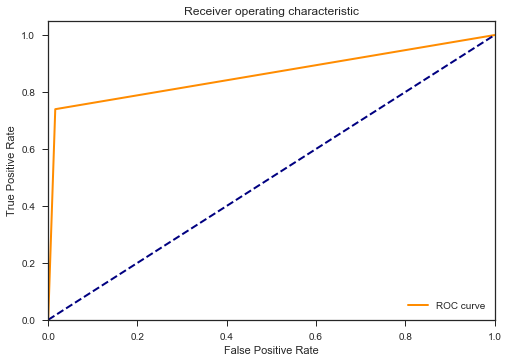

In [22]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

A random forest has given a very high accuracy of 92.9 we might exceed it slightly by increasing more tree(n_estimator) and considering all features at split(current model only considers sqrt of number of features). Although this simple model has given a decent performance and has even beaten the gradient boosted decision tree at valdiation set accuracy. Looking at the confusion matrix we see that the 67,095 cases were predicted correctly-TP(flight would "not be delayed") and 14,613 cases were identified correctly-TN (flight would be "delayed"). However if we see the FN, FP in our confusion matrix and shape of ROC, we realize our model is not very good at identifying the flights "delayed". Its good at idnetifying flights "not delayed".  Out of approximately 20,000 delay cases ,1/4th is incorrectly identified. 

### Further Work

A very small hyper parameter space is explored using gridsearch. In future a more extended grid search can be used. Extreme gradient boosted decision trees (XGBoost) can also be tried in further work to check whether it beats the current best model(RF). In practice one should gradually increase the number of trees in the forest (n_Estimator) to get an idea of where we are hitting the saturation point. Such knee point can be used as the number of trees for our model. We have used complete training set, in future varying training set size and studying the effect on validation set accuracy could help. Luckily we did not have to impute the values but in future if we extend the training set size to more years we might have a better data set and have missing values. Then we can impute missing data with mean, mode, interpolation or a combination of these methods. Moreover, in RF we did not play around how continuous features are binned, this can be explored in further works.